# Tips

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)  
The dataset being used is tips from Seaborn.

### Step 1. Import the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',15)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv). 

### Step 3. Assign it to a variable called tips

In [15]:
tips = pd.read_csv('tips.csv')
tips.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


### Step 4. Delete the Unnamed 0 column

In [16]:
mask = tips.columns.str.contains('Unnamed')
tips = tips.loc[:,~mask]
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Step 5. Plot the total_bill column histogram

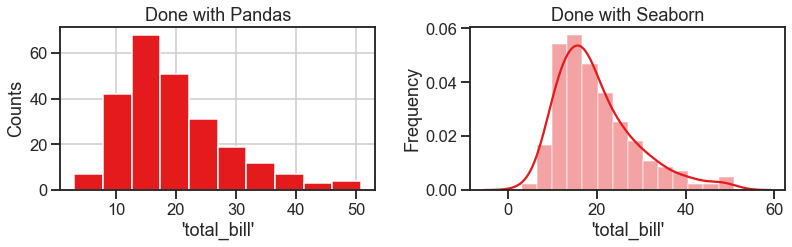

In [273]:
sns.set(context='talk', style='ticks', palette='Set1')

fig, axs = plt.subplots(1,2)
fig.set_size_inches(13,3)

tips.hist('total_bill', ax=axs[0])
axs[0].set_title('Done with Pandas')
axs[0].set_ylabel('Counts')

sns.distplot(tips['total_bill'], hist=True, ax=axs[1])
axs[1].set_title('Done with Seaborn')
axs[1].set_ylabel('Frequency')

plt.gcf().set_facecolor('w')
for ax in axs:
    ax.set_xlabel("'total_bill'")
plt.show()

### Step 6. Create a scatter plot presenting the relationship between total_bill and tip

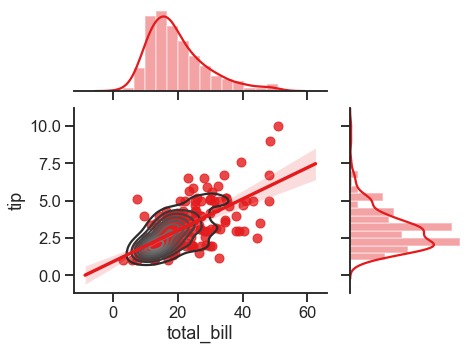

In [274]:
jp = sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg', ratio=2)
jp.plot_joint(sns.kdeplot, zorder=2, n_levels=8, **{'color':'grey'})
fig = plt.gcf()
fig.set_facecolor('w')
fig.set_size_inches(7,5)

plt.show()

### Step 7.  Create one image with the relationship of total_bill, tip and size.
#### Hint: It is just one function.

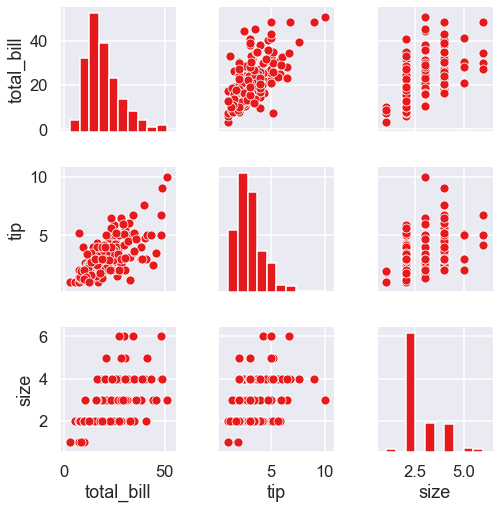

In [153]:
sns.pairplot(data=tips, vars=['total_bill', 'tip', 'size'])
plt.show()

### Step 8. Present the relationship between days and total_bill value

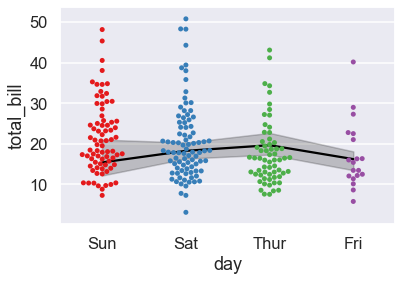

In [184]:
fig, ax = plt.subplots(1)
sns.lineplot(x='day', y="total_bill", data=tips, color='k',estimator=np.median, ax=ax)
sns.swarmplot(x='day', y="total_bill", data=tips, ax=ax)
# plt.show()

### Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

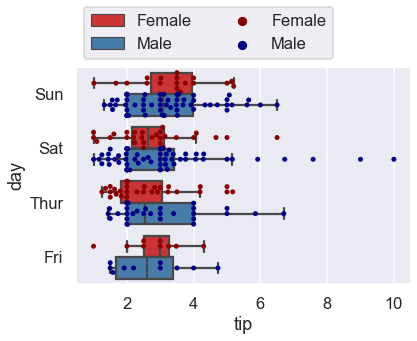

In [210]:
sns.swarmplot(data=tips, x='tip', y='day', hue='sex', dodge=True, palette=['darkred', 'darkblue'])
sns.boxplot(data=tips, x='tip', y='day', hue='sex', dodge=True, showfliers=False)
plt.legend(bbox_to_anchor=(0,1), ncol=2)
plt.show()

### Step 10.  Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

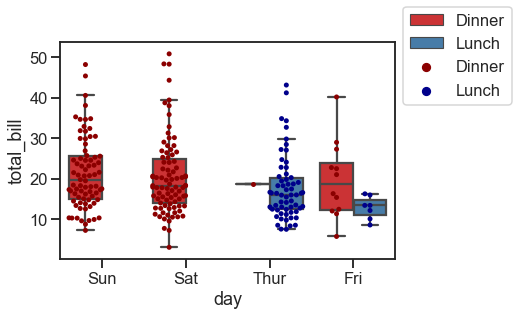

In [277]:
sns.swarmplot(data=tips, x='day', y='total_bill', hue='time', dodge=True, palette=['darkred', 'darkblue'])
sns.boxplot(data=tips, x='day', y='total_bill', hue='time', dodge=True, showfliers=False)
plt.legend(bbox_to_anchor=(1,1.2))
plt.show()

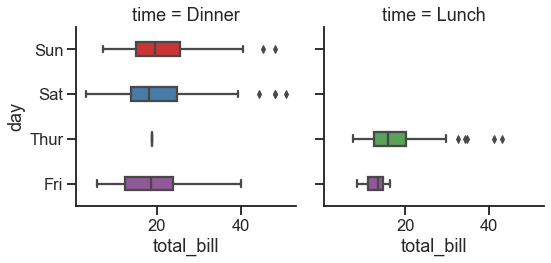

In [283]:
sns.catplot(data=tips, y='day', x='total_bill', col='time', width=0.3, kind='box', height=4, aspect=1)
plt.show()

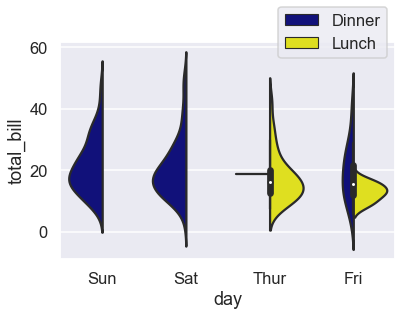

In [221]:
sns.violinplot(data=tips, x='day', y='total_bill', hue='time', split=True, kind='violin', palette=['darkblue', 'yellow'])
plt.legend(bbox_to_anchor=(1,1.2))
plt.show()

### Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

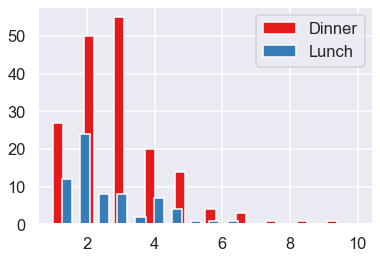

In [261]:
tips.groupby('time')['tip'].hist(width=0.3)
plt.legend(labels=['Dinner', 'Lunch'])
plt.show()

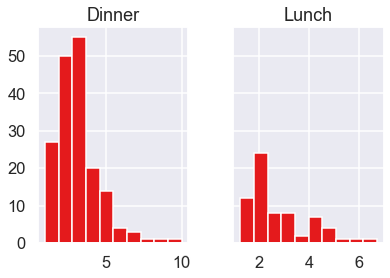

In [260]:
tips.hist(column='tip', by='time', xrot=True, sharey=True)
plt.show()

### Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker
### They must be side by side.

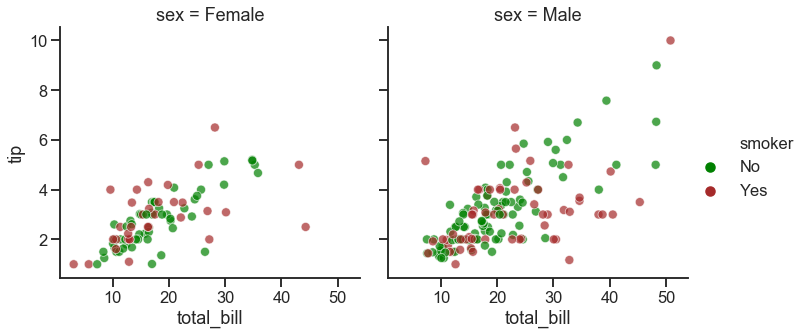

In [288]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='smoker', col='sex', alpha=0.7, palette=['green', 'brown'])
plt.show()

### BONUS: Create your own question and answer it using a graph.